# Searching & Sorting
- Not frequent in ML however:
  - Examplary to demo: 
    - Time complexity
    - Space complexity
    - Tyipcal time/space tradeoff
  - Helpful for ML pipelines:
    - Data Capture
    - Preprocessing
    - Training
    - Deployment

# 4.3 Merge Sort

* General idea is to "divide and conquer"; specifically:
    1. Halve the array into smaller arrays
    2. Sort the smaller arrays
    3. Merge them back into full array
* The above steps are carried out **recursively** so ultimately sort arrays of max length 2, then merge back up to full length.

## `pop()`
- Makes use of the simple but important property of `pop()` function. 
  - `pop()` literally pops the element from the place, so once popped, it's gone from the list.

## Merge Sort Algorithm
- Playing with index numbers &
- `pop()`

In [ ]:
# using list instead of array so we can .pop() (np arrays don't pop with built-in method)

def merge_sort(my_list): 
    
    if len(my_list) > 1: # First, check if the list has more than 1 element. 
                         # if length is 1, it needs not be sorted 
                         # (at deepest recursion, some will have len 1, others len 2)
        
        # 1. Halve: whenever halving happens, it's ~O(log n)
        midpoint = len(my_list) // 2        # Note: ~O(log n)
        left_half = my_list[:midpoint]
        right_half = my_list[midpoint:]

        # 2. Sort (recursively):
        left_half = merge_sort(left_half)
        right_half = merge_sort(right_half)
        
        my_list = []
        
        # 3. Merge: popping elements off.
        while len(left_half) > 0 and len(right_half) > 0: # Note: This inner loop exhibits ~O(n) behavior (linear)
            
            if left_half[0] < right_half[0]:
                my_list.append(left_half.pop(0)) # pop first element (and it's gone.)
                                                 # and then the [left_half] list becomes empty.
                                                 # when both the single-element lists get popped, the while loop will stop.
            
            else: # 1st element of right half < 1st element of left
                my_list.append(right_half.pop(0)) # pop and append the smaller value to my_list
                
        # If any elements remain from either half, they must be the largest value:
        for i in left_half:
            my_list.append(i)
        for i in right_half:
            my_list.append(i)
    
    return my_list

In [ ]:
m = list(np.array([np.random.randint(0, 101) for integre in range(10)]))
m

[44, 70, 97, 4, 96, 32, 78, 15, 100, 35]

In [ ]:
merge_sort(m)

[4, 15, 32, 35, 44, 70, 78, 96, 97, 100]

## Visible Merge Sort

In [ ]:
# using list instead of array so we can .pop() (np arrays don't pop with built-in method)

def visible_merge_sort(my_list): 

    if len(my_list) > 1: # First, check if the list has more than 1 element. 
                         # if length is 1, it needs not be sorted 
                         # (at deepest recursion, some will have len 1, others len 2)

           
        # 1. Halve: whenever halving happens, it's ~O(log n)
        midpoint = len(my_list) // 2        # Note: ~O(log n)
        left_half = my_list[:midpoint]
        right_half = my_list[midpoint:]
        print(f'1 Halve op')
        print(f'1 midpoint: {midpoint}')
        print(my_list)
        print(f"1 left_half = my_list[:{midpoint}] - {my_list[:midpoint]}")
        print(f"1 right_half = my_list[{midpoint}:] - {my_list[midpoint:]}\n")
        # The operation Halve (1) keeps chopping the list untile there is only 1 element in the list. 


        # 2. Sort (recursively):
        print(f'2 Sort op - left_half')
        left_half = visible_merge_sort(left_half)
        print(f'2 Sort op - right_half\n')
        right_half = visible_merge_sort(right_half)
        
        my_list = []
        
        # 3. Merge: popping elements off.
        while len(left_half) > 0 and len(right_half) > 0: # Note: This inner loop exhibits ~O(n) behavior (linear)
            
            if left_half[0] < right_half[0]:
                print(f"3 Merge op")
                left_pop = left_half.pop(0)
                my_list.append(left_pop) # pop first element
                print(f'3 popped from left half: {left_pop}\n')
                print(my_list)
            
            else: # 1st element of right half < 1st element of left
                print(f"3 Merge op")
                right_pop = right_half.pop(0)
                my_list.append(right_pop) # pop and append the smaller value to my_list
                print(f'3 popped from right half: {right_pop}\n')
                print(my_list)


        # If any elements remain from either half, they must be the largest value:
        for i in left_half:
            my_list.append(i)
            print(f'4 append i op')
            print(f"i in left half: {i}")
            print(my_list)
        for i in right_half:
            my_list.append(i)
            print(f'4 append i op')            
            print(f"i in right half: {i}")
            print(f"{my_list}\n")
    
    return my_list

In [ ]:
visible_merge_sort(v)

1 Halve op
1 midpoint: 5
[61, 63, 72, 76, 1, 93, 16, 61, 55, 2]
1 left_half = my_list[:5] - [61, 63, 72, 76, 1]
1 right_half = my_list[5:] - [93, 16, 61, 55, 2]

2 Sort op - left_half
1 Halve op
1 midpoint: 2
[61, 63, 72, 76, 1]
1 left_half = my_list[:2] - [61, 63]
1 right_half = my_list[2:] - [72, 76, 1]

2 Sort op - left_half
1 Halve op
1 midpoint: 1
[61, 63]
1 left_half = my_list[:1] - [61]
1 right_half = my_list[1:] - [63]

2 Sort op - left_half
2 Sort op - right_half

3 Merge op
3 popped from left half: 61

[61]
4 append i op
i in right half: 63
[61, 63]

2 Sort op - right_half

1 Halve op
1 midpoint: 1
[72, 76, 1]
1 left_half = my_list[:1] - [72]
1 right_half = my_list[1:] - [76, 1]

2 Sort op - left_half
2 Sort op - right_half

1 Halve op
1 midpoint: 1
[76, 1]
1 left_half = my_list[:1] - [76]
1 right_half = my_list[1:] - [1]

2 Sort op - left_half
2 Sort op - right_half

3 Merge op
3 popped from right half: 1

[1]
4 append i op
i in left half: 76
[1, 76]
3 Merge op
3 popped from

[1, 2, 16, 55, 61, 61, 63, 72, 76, 93]

## Mathematical Explanation

Because of the O($n$) loop performing comparisons inside of the function halving list sizes (which we'll need to call O(log $n$) times), merge sort time complexity is the product, i.e., O($n$ log $n$). 

Inside the `merge_sort()` function:

- 1. Halve: $O(\text{log } n)$  
- 3. Marge: $O(n)$

Therefore: 

$$O(\text{log } n) \cdot n = O(n \cdot \text{log } n)$$

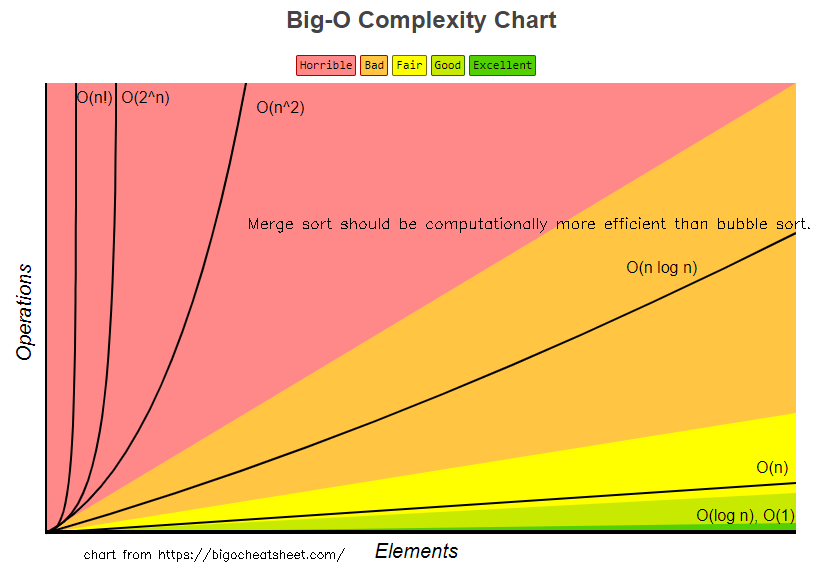

In [ ]:
big_o = get_img("/content/here/MyDrive/Data and Algorithms/ALGO02/big-O complexity chart.png", resize=1)
big_o = take_notes(big_o, "Merge sort should be computationally more efficient than bubble sort.", 
                   org=(0.3, 0.4), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, color=1, thickness=1)
big_o = cite_source(big_o, "chart from https://bigocheatsheet.com/", scale=0.4)
cv2_imshow(big_o)

## Merge Sort Time Complexity

In [ ]:
tens = [10**n for n in range(1, 6)]
fifties = [5*10**n for n in range(1, 5)]
lengths = (tens + fifties)
lengths.sort()
lengths

[10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000]

In [ ]:
# Use the single list.
start = time.process_time()
random_list = list(np.array([np.random.randint(0, 100000) for integer in range(100000)]))
end = time.process_time()
print(f"random list generation completed in {end - start} seconds.\n")
print(f"list sample: {random_list[:20]}\n")

merge_times = []

for length in lengths:
    print(f"Merge sort {length} items")
    start = time.process_time()
    sorted_list = merge_sort(random_list[:length])
    end = time.process_time()
    print(f"Sorted list: {sorted_list[:20]}")
    print(f'Runtime: {end - start} seconds\n')

    merge_times.append(end - start)

random list generation completed in 0.32959652099998493 seconds.

list sample: [23209, 95026, 61834, 35665, 11282, 61191, 86851, 26214, 61103, 41306, 16875, 36417, 13277, 27485, 55198, 87175, 73891, 96197, 48138, 57575]

Merge sort 10 items
Sorted list: [11282, 23209, 26214, 35665, 41306, 61103, 61191, 61834, 86851, 95026]
Runtime: 0.015920764000043164 seconds

Merge sort 50 items
Sorted list: [2066, 9860, 10533, 11282, 11769, 13277, 16875, 17763, 23209, 26214, 27361, 27485, 30949, 31997, 32085, 32118, 32201, 35665, 36417, 37820]
Runtime: 0.0002597949999199045 seconds

Merge sort 100 items
Sorted list: [2066, 2374, 6293, 6956, 9860, 10533, 11282, 11769, 13277, 16875, 17318, 17763, 20066, 21453, 23209, 24851, 26214, 27361, 27485, 28213]
Runtime: 0.0004155079999463851 seconds

Merge sort 500 items
Sorted list: [47, 159, 302, 535, 539, 897, 900, 1025, 1706, 1822, 2066, 2116, 2374, 2706, 3257, 3667, 3720, 4488, 4540, 4659]
Runtime: 0.002258973999914815 seconds

Merge sort 1000 items
Sorted

In [ ]:
merge_time_df = pd.DataFrame(list(zip(lengths, merge_times)), columns=["length", "time"])
merge_time_df

,length,time
0,10,0.015921
1,50,0.000260
2,100,0.000416
3,500,0.002259
4,1000,0.004929
5,5000,0.032023
6,10000,0.072774
7,50000,0.618538
8,100000,1.715516


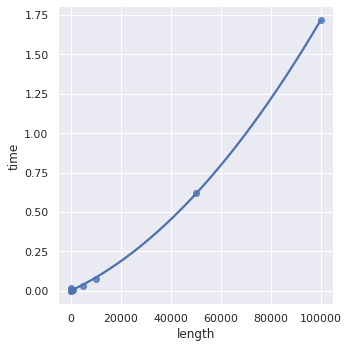

In [ ]:
sb.lmplot(x='length', y='time', data=merge_time_df, ci=None, order=2)

- **Time Efficiency** (Merge Sort)
  - Merge sort is much more time-efficient relative to the bubble sort. 
- **Memory Efficiency** (Bubble Sort)
  - However, memory efficiency wise, bubble sort is much more efficient. It's storing only 2 elements per operation. 
 

Exerpt from [Dr Krohn's notebook **7-algos-and-data-structures.ipynb**](https://colab.research.google.com/github/jonkrohn/ML-foundations/blob/master/notebooks/7-algos-and-data-structures.ipynb#scrollTo=d4tBvI88BheF): 

In contrast, while memory complexity for bubble sort was O(1) because we were sorting "in place" (not storing any values in memory), memory complexity is O($n$) for merge sort. 

(We need at least two array copies (2$n$) for the most space-efficient merge sort implementations, but we drop constants so this becomes O($n$). Our recursive merge sort implementation would require more as it stores several copies in memory; one more copy of size $n$ would be used for every time the array length doubles (log $n$) resulting in O($n$ log $n$) memory complexity.)

<br/>

---

<br/>

Over the course of studying this topic, you'll: 

* Use “Big O” notation to characterize the time efficiency and space efficiency of a given algorithm, enabling you to select or devise the most sensible approach for tackling a particular machine learning problem with the hardware resources available to you.
* Get acquainted with the entire range of the most widely-used Python data structures, including list-, dictionary-, tree-, and graph-based structures. 
* Develop an understanding of all of the essential algorithms for working with data, including those for searching, sorting, hashing, and traversing. 

## References

My algorithm learning notebook following the live lesson series [**"Data Structures, Algorithms, and Machine Learning Optimization"**](https://learning.oreilly.com/videos/data-structures-algorithms/9780137644889/) by Dr. Jon Krohn. I adapted some and partially modified or added entirely new code. Notes largely based on and (some of them entirely) from Jon's notebooks and learning materials. The lesson and original notebook source code at:

https://learning.oreilly.com/videos/data-structures-algorithms/9780137644889/
https://github.com/jonkrohn/ML-foundations/blob/master/notebooks/7-algos-and-data-structures.ipynb